In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import learning_curve
from time import time
from sklearn import metrics  
from sklearn.tree import DecisionTreeRegressor
from graphviz import Source
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.neural_network import MLPRegressor

C:\Users\laava\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Reading data into dataframe
Xdata = pd.read_csv('twitter-train.csv',encoding='utf-8')

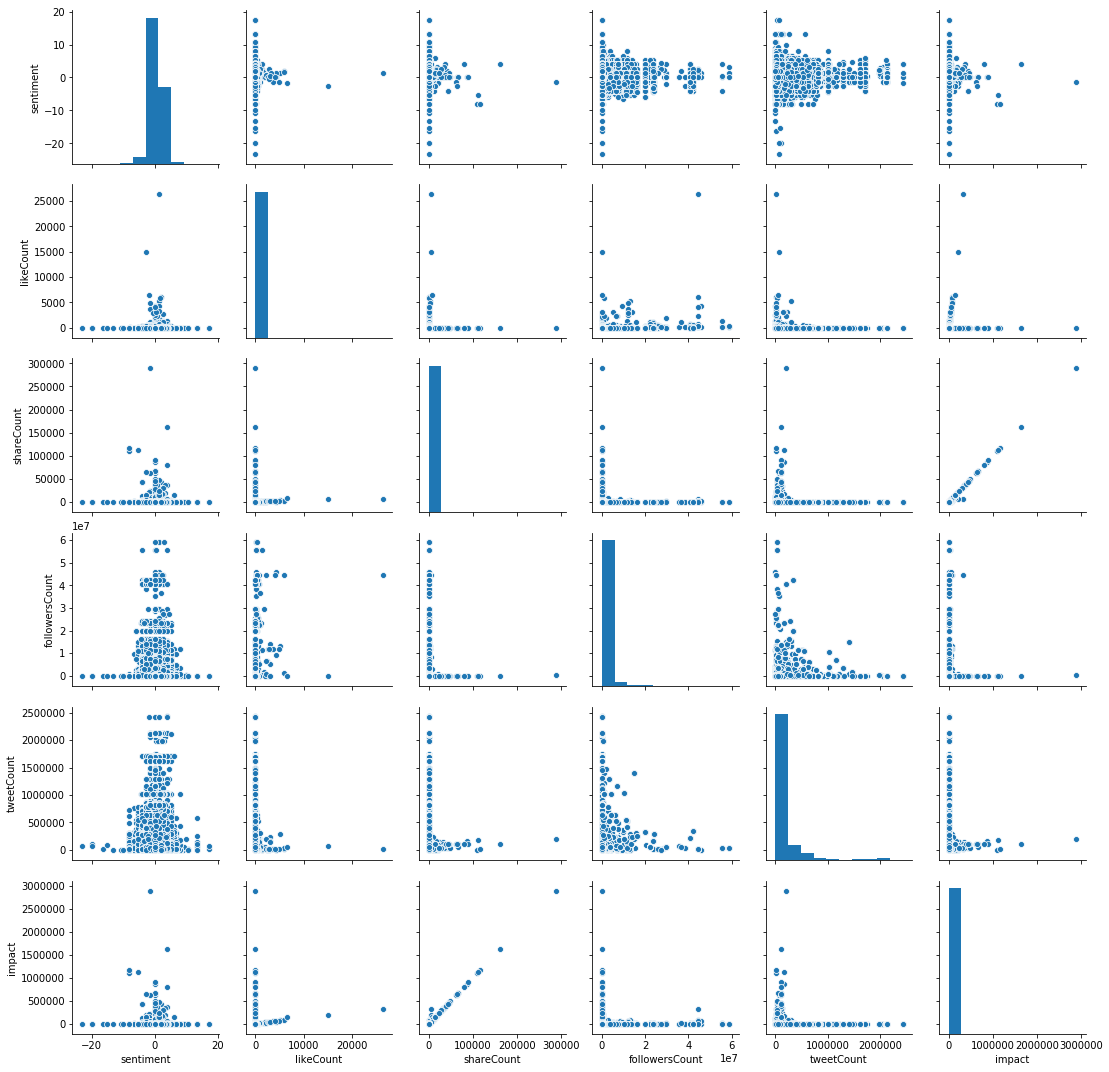

In [3]:
#Data Analysis

#Pair plots of top 5 attributes
sub_data = Xdata.iloc[:,[3,8,9,11,13,17]].copy()
print(sns.pairplot(sub_data))


C:\Users\laava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


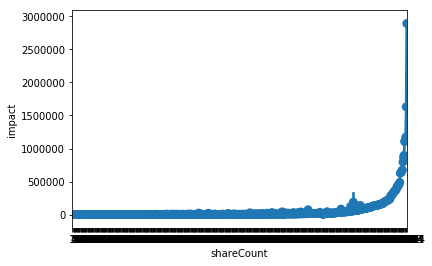

In [4]:
XShares = Xdata.sort_values(['shareCount'],ascending=0)
Xsentiment = Xdata.sort_values(['sentiment'],ascending=0)
XLikes = Xdata.sort_values(['likeCount'],ascending=0)
XTweets = Xdata.sort_values(['tweetCount'],ascending=0)
XFollowers = Xdata.sort_values(['followersCount'],ascending=0)
XImpact = Xdata.sort_values(['impact'],ascending=0)
XPeak = Xdata.sort_values(['peakVelocity'],ascending=0)

sns.pointplot(XShares["shareCount"].head(10000),XShares["impact"].head(10000))





C:\Users\laava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


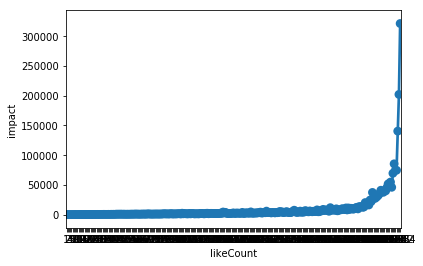

In [5]:
sns.pointplot(XLikes["likeCount"].head(10000),XLikes["impact"].head(10000))

C:\Users\laava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


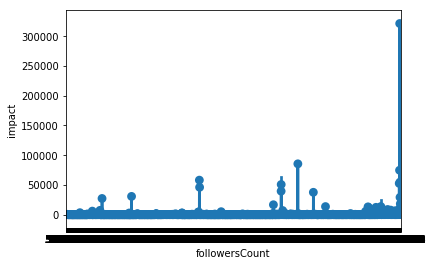

In [6]:
sns.pointplot(XFollowers["followersCount"].head(5000),XFollowers["impact"].head(5000))

C:\Users\laava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


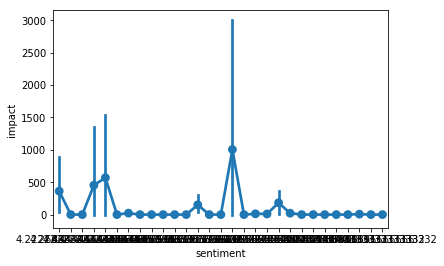

In [7]:
sns.pointplot(Xsentiment["sentiment"].head(5000),Xsentiment["impact"].head(5000))

In [8]:
#Features selected based on scatter plot and correlation between feature and target variable
feature_names = ['shareCount', 'likeCount']
X = Xdata[feature_names]
y = Xdata['impact']

#Train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [9]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=2,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    cv=ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt


No handles with labels found to put in legend.


Training time  0.027
Intercept :  -0.6090619672710886
Coefficient :  [ 9.99971358 10.00018299]
Confidence  0.9999822956679445
Mean Absolute Error: 1.237977139591086
R2 Score: 0.9999822956679445
Root Mean Squared Error: 50.34726284833575


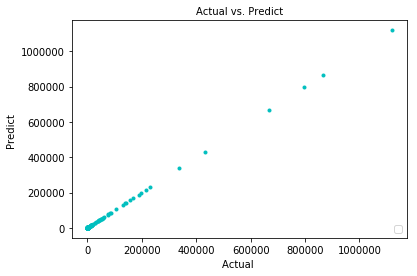

R2 Score - cross val 0.9999726386939658
Root Mean Squared Error - cross val: 69.92847364893895
Mean Absolute Error: 1.234666697563772


<module 'matplotlib.pyplot' from 'C:\\Users\\laava\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

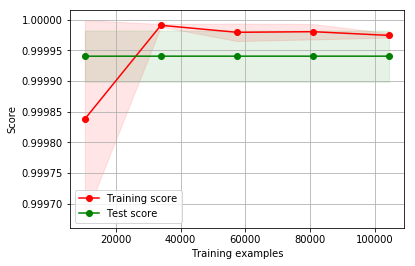

In [10]:
#LINEAR REGRESSION

regressor = LinearRegression()
t0=time()
regressor.fit(X_train, y_train)  
print('Training time ',round(time()-t0, 3))
print('Intercept : ',regressor.intercept_)  
print('Coefficient : ',regressor.coef_)  

y_pred = regressor.predict(X_test)

print('Confidence ',regressor.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

plt.legend(loc=4)
plt.title('Actual vs. Predict', size=10)
plt.scatter(y_test,y_pred,color='c', marker='.')
plt.xlabel('Actual ', size=10)
plt.ylabel('Predict ', size=10)
plt.show()

#10-fold cross validation
scores=cross_val_score(regressor,X,y,cv=10)
kf=KFold(n_splits=10, random_state=None,shuffle=True)

# Make Cross Validated predictions
predictions2=cross_val_predict(regressor,X,y,cv=10)
#Check the R2- the proportion of variance in the dependent variable explained by the predictors
accuracy=metrics.r2_score(y,predictions2)
print ('R2 Score - cross val',accuracy)
print('Root Mean Squared Error - cross val:', np.sqrt(metrics.mean_squared_error(y, predictions2))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2))  

plot_learning_curve(regressor,X,y)

Training time  0.064
Mean Absolute Error: 13.003103817387228
R2 Score: 0.9953936988650876
Root Mean Squared Error: 812.1051318193503


<module 'matplotlib.pyplot' from 'C:\\Users\\laava\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

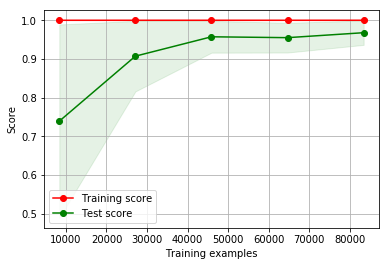

In [11]:
#DECISION TREE REGRESSION
dtregressor = DecisionTreeRegressor(random_state=0)
t0=time()
dtregressor.fit(X_train, y_train)
print('Training time ',round(time()-t0, 3))

y_pred = dtregressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

plot_learning_curve(dtregressor,X_train,y_train)

Training time  3.427
Mean Absolute Error: 11.303050311045935
R2 Score: 0.9969942463906921
Root Mean Squared Error: 656.0135054138967


<module 'matplotlib.pyplot' from 'C:\\Users\\laava\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

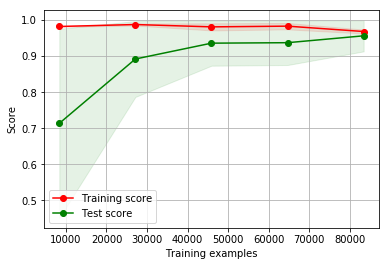

In [12]:
#RANDOM FOREST REGRESSION

rfregressor = RandomForestRegressor(random_state=0,
                             n_estimators=76)
t0=time()
rfregressor.fit(X_train, y_train)
print('Training time ',round(time()-t0, 3))
y_pred = rfregressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 Score:', metrics.r2_score(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

plot_learning_curve(rfregressor,X_train,y_train)



Training time  7.46
Mean Absolute Error: 12.76531076406798
R2 Score: 0.9954737085537931
Root Mean Squared Error: 805.0212582800808


<module 'matplotlib.pyplot' from 'C:\\Users\\laava\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

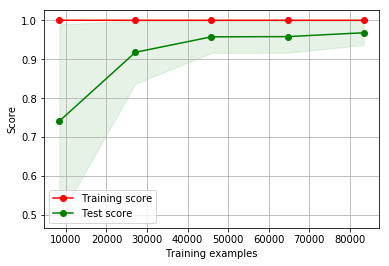

In [13]:
#ADABOOST REGRESSION

abregressor = AdaBoostRegressor(dtregressor,
                          n_estimators=100, random_state=0)
t0=time()
abregressor.fit(X_train, y_train)
print('Training time ',round(time()-t0, 3))
y_pred = abregressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

plot_learning_curve(abregressor,X_train,y_train)

Training time  12.615
Mean Absolute Error: 1.1392221783043275
R2 Score: 0.9999819431949801
Root Mean Squared Error: 50.84597105985468
R2 Score - cross val 0.9999723752586471
Root Mean Squared Error - cross val: 70.2643037611409
Mean Absolute Error: 1.155971119287678


C:\Users\laava\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\laava\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\laava\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

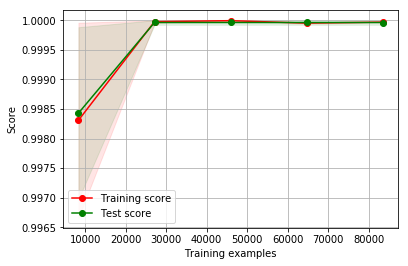

In [14]:
#MLP REGRESSION

mlpreg = MLPRegressor(hidden_layer_sizes=(5),random_state=0)
t0=time()
mlpreg.fit(X_train, y_train)
print('Training time ',round(time()-t0, 3))
y_pred = mlpreg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#10-fold cross validation
scores=cross_val_score(mlpreg,X,y,cv=10)
kf=KFold(n_splits=10, random_state=None,shuffle=True)

# Make Cross Validated predictions
predictions2=cross_val_predict(mlpreg,X,y,cv=10)
#Check the R2- the proportion of variance in the dependent variable explained by the predictors
accuracy=metrics.r2_score(y,predictions2)
print ('R2 Score - cross val',accuracy)
print('Root Mean Squared Error - cross val:', np.sqrt(metrics.mean_squared_error(y, predictions2))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2))  

plot_learning_curve(mlpreg,X_train,y_train)